## Module 5

##### Problem 5.1 
For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. ( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )

In [22]:
import pandas as pd
import numpy as np

In [23]:
Hul_data=pd.read_csv("C:/Users/Lenovo/Desktop/ML INTERNSHIP/HINDUNILVR.csv")
Hul_data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,HINDUNILVR,EQ,15-May-17,980.20,981.3,988.85,974.55,982.5,983.25,980.72,734446,7.202888e+08,32976,420159,57.21
1,HINDUNILVR,EQ,16-May-17,983.25,983.0,1002.50,982.05,999.5,1000.40,994.00,1503815,1.494798e+09,39717,669576,44.53
2,HINDUNILVR,EQ,17-May-17,1000.40,1004.0,1012.00,991.10,1009.0,1009.40,1003.84,1999387,2.007056e+09,63210,996054,49.82
3,HINDUNILVR,EQ,18-May-17,1009.40,1008.0,1009.00,983.00,987.5,990.25,997.56,2690943,2.684374e+09,78098,983594,36.55
4,HINDUNILVR,EQ,19-May-17,990.25,1000.0,1022.75,1000.00,1004.1,1008.00,1009.97,3059815,3.090316e+09,57429,1523108,49.78


In [24]:
## Mean daily return
Mean_Daily_Return = Hul_data['Close Price'].pct_change().dropna().mean()
Mean_Daily_Return

0.0011856032175239304

In [25]:
# Daily Standard deviation of returns
Daily_Standard_deviation_Returns=  Hul_data['Close Price'].pct_change().dropna().std()
Daily_Standard_deviation_Returns

0.012211153040268803

In [26]:
# Annual mean
# annual mean = daily mean * 252 
Annual_Mean= Mean_Daily_Return*252
Annual_Mean

0.29877201081603044

In [27]:
# Volatility for 1 year
# annual stdev = daily stdev * sqrt(252)
Volatility= Daily_Standard_deviation_Returns*np.sqrt(252)
Volatility

0.19384604499540928

##### Problem 5.2
Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance )

In [28]:
## Reading the data
cipla_data=pd.read_csv("C:/Users/Lenovo/Desktop/ML INTERNSHIP/PORTFOLIO/CIPLA.csv")
maruti_data=pd.read_csv("C:/Users/Lenovo/Desktop/ML INTERNSHIP/PORTFOLIO/MARUTI.csv")
mindtree_data=pd.read_csv("C:/Users/Lenovo/Desktop/ML INTERNSHIP/PORTFOLIO/MINDTREE.csv")
pnb_data=pd.read_csv("C:/Users/Lenovo/Desktop/ML INTERNSHIP/PORTFOLIO/PNB.csv")
pvr_data=pd.read_csv("C:/Users/Lenovo/Desktop/ML INTERNSHIP/PORTFOLIO/PVR.csv")

In [29]:
### Building a dataframe of the close prices of the 5 stocks.
Portfolio_data= pd.concat([cipla_data['Close Price'], maruti_data['Close Price'],mindtree_data['Close Price'],pnb_data['Close Price'],pvr_data['Close Price']], axis=1, keys=['CIPLA', 'MARUTI','MINDTREE','PNB','PVR'])
Portfolio_data

,CIPLA,MARUTI,MINDTREE,PNB,PVR
0,569.00,6823.90,509.45,166.80,1524.95
1,565.60,6953.95,511.30,174.15,1539.00
2,562.35,6958.20,506.35,165.05,1530.30
3,560.10,6831.05,492.90,158.50,1515.05
4,564.95,6790.55,497.50,155.20,1513.55
...,...,...,...,...,...
491,557.95,6702.00,980.45,84.25,1748.50
492,558.00,6650.15,975.35,86.25,1758.45
493,557.75,6624.95,979.10,79.80,1715.40
494,555.55,6631.60,NaN,NaN,1724.00


In [30]:
### Since we are going to perform arithmetic operation on the weights of the stocks , we make an array instead of a list.
weights_of_stock = np.asarray([0.2,0.2,0.2,0.2,0.2])

In [31]:
## Calculating mean dailyreturns
Mean_Daily_Returns = Portfolio_data.pct_change().mean()

## Calculating annual returns from the portfolio
Annual_Portfolio_Return = ((Mean_Daily_Returns * weights_of_stock) * 252).sum()
print('Annual_Portfolio_Return')
Annual_Portfolio_Return

Annual_Portfolio_Return


0.05576888820665395

In [32]:
### Calculating colvariance matrix
Covariance_matrix =  Portfolio_data.pct_change().cov()
Covariance_matrix

,CIPLA,MARUTI,MINDTREE,PNB,PVR
CIPLA,0.000256,0.000026,0.000058,0.000091,0.000033
MARUTI,0.000026,0.000201,0.000035,0.000058,0.000071
MINDTREE,0.000058,0.000035,0.000461,0.000082,0.000040
PNB,0.000091,0.000058,0.000082,0.001176,0.000030
PVR,0.000033,0.000071,0.000040,0.000030,0.000380


In [33]:
## Volatility of the portfolio is product of the transposed weights, covariance matrix and the weights again.
Annual_Volatility = np.sqrt(np.dot(weights_of_stock.T,np.dot(Covariance_matrix, weights_of_stock))) * np.sqrt(252)
print('Annual Volatility')
Annual_Volatility

Annual Volatility


0.18838069115154937

##### Problem 5.3
Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

In [34]:
## Now we will use Monte-Carlo Simulation with different weights of stocks in the portfolio.
### 1st we create an array of random weights function for the portfolio

def Random_Weights():
    weights  = np.random.rand(Portfolio_data.shape[1]) ## Portfolio_data.shape[1] is 5 which is the number of stocks in portfolio
    s=sum(weights) ### Needed to make the sum of the array equal to 1
    weights=weights/s
    return  weights

Random_Weights()


array([0.25455481, 0.29786075, 0.13323879, 0.29810554, 0.01624012])

In [36]:
## Creating a dataframe of the portfolio returns & volatility with different simulation results

from pandas import Series, DataFrame

Simulation_data = DataFrame()
for i in range(0, 4000):
    Weight_r   = Random_Weights()
    Annual_returns    = ((Mean_Daily_Returns * Weight_r) * 252).sum()
    Annual_volatility = np.sqrt(np.dot(Weight_r.T,np.dot(Covariance_matrix, Weight_r))) * np.sqrt(252)
    sharpe     = Annual_returns / Annual_volatility
    Simulation_data = Simulation_data.append([{
        "Weights":    Weight_r,
        "Returns":    Annual_returns,
        "Volatility": Annual_volatility,
        "Sharpe Ratio": sharpe
    }])

Simulation_data.reset_index(inplace=True, drop=True)
Simulation_data.head()

,Weights,Returns,Volatility,Sharpe Ratio
0,"[0.3004449661512844, 0.013034721633933334, 0.2...",0.099480,0.194307,0.511970
1,"[0.11297822207224639, 0.44516995308983714, 0.0...",-0.039257,0.208815,-0.187998
2,"[0.08833157758092229, 0.11231762009112214, 0.4...",0.147785,0.238967,0.618431
3,"[0.18944298703566384, 0.4806243296511901, 0.19...",0.091189,0.165013,0.552614
4,"[0.08559601771588904, 0.2859727990450444, 0.15...",0.039269,0.195259,0.201114


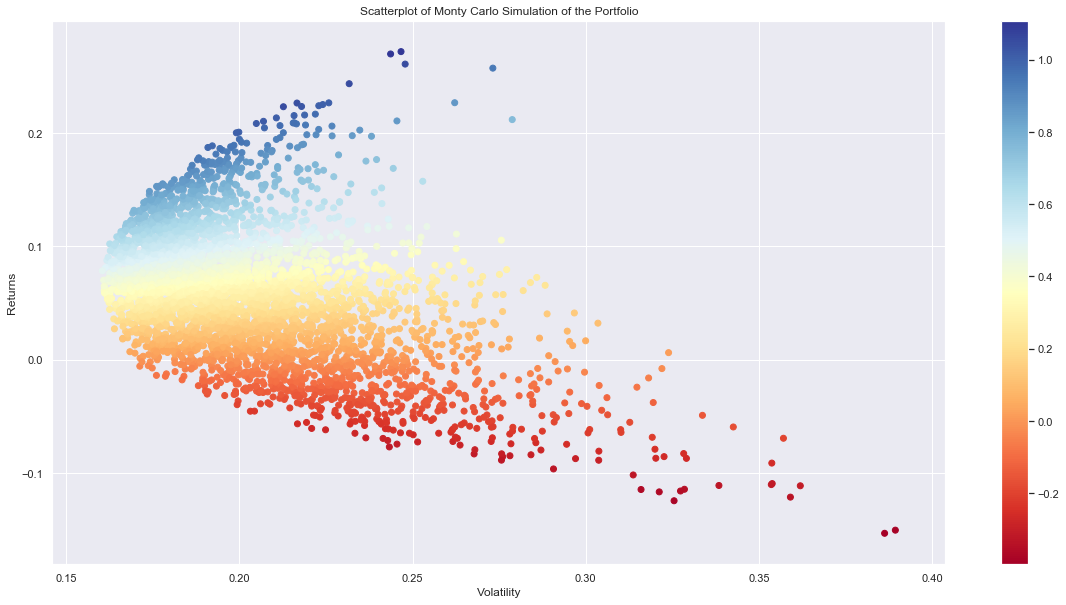

In [37]:
### Plotting the scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(20,10))
plt.scatter( Simulation_data['Volatility'], Simulation_data['Returns'], c = Simulation_data['Sharpe Ratio'],cmap='RdYlBu')
plt.title('Scatterplot of Monty Carlo Simulation of the Portfolio')
plt.ylabel('Returns')
plt.xlabel('Volatility')
plt.colorbar()

##### Problem 5.4 
Mark the 2 portfolios where -
- Portfolio 1 - The Sharpe ratio is the highest 
- Portfolio 2 - The volatility is the lowest.

In [38]:
## Finding the location of the row with  the highest Sharpe Ratio
Maximum_Sharpe = Simulation_data.loc[ Simulation_data['Sharpe Ratio'].idxmax()]
Maximum_Sharpe

Weights         [0.14021728543629175, 0.043407694930766495, 0....
Returns                                                  0.270009
Volatility                                               0.243672
Sharpe Ratio                                              1.10808
Name: 755, dtype: object

In [39]:
## Finding the location of the row with the lowest volatility
Minimum_volatility = Simulation_data.loc[ Simulation_data['Volatility'].idxmin()]
Minimum_volatility

Weights         [0.2782178980322479, 0.37586512823303814, 0.16...
Returns                                                 0.0785443
Volatility                                               0.160461
Sharpe Ratio                                             0.489492
Name: 2868, dtype: object

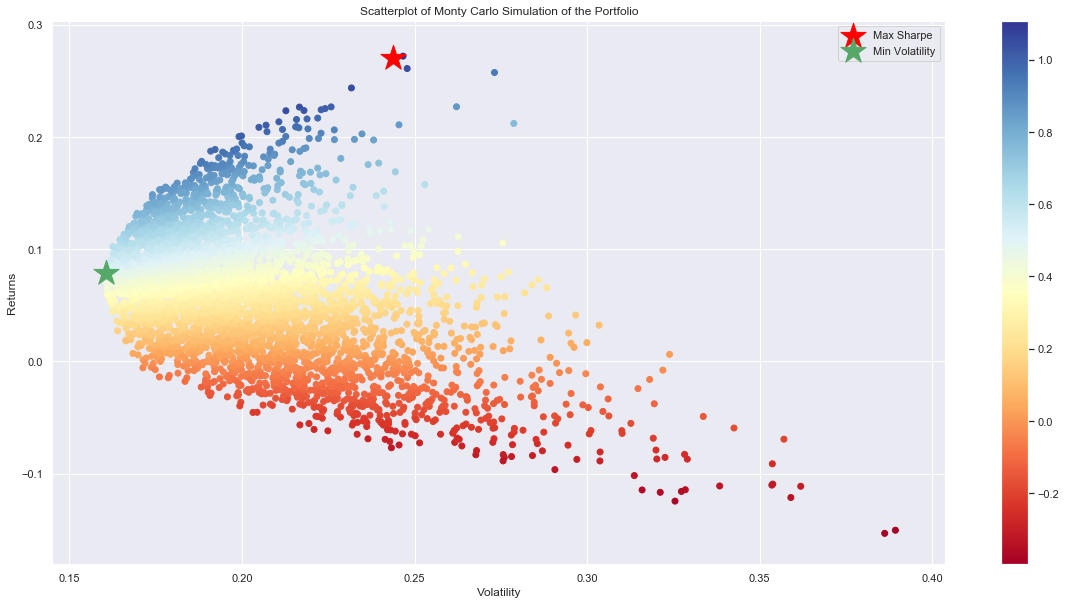

In [42]:
### Copy-pasting the previous scatter plot codes

plt.figure(figsize=(20,10))
plt.scatter( Simulation_data['Volatility'], Simulation_data['Returns'], c = Simulation_data['Sharpe Ratio'],cmap='RdYlBu')
plt.title('Scatterplot of Monty Carlo Simulation of the Portfolio')
plt.ylabel('Returns')
plt.xlabel('Volatility')
plt.colorbar()


#### Highlighting the Max Sharpe and Min Volatility points in the scatter plot
plt.scatter( Maximum_Sharpe['Volatility'],     Maximum_Sharpe['Returns'], marker='*', s=700, c='red', label='Max Sharpe')
plt.scatter( Minimum_volatility['Volatility'], Minimum_volatility['Returns'] ,marker='*', s=700, c='g',label='Min Volatility')
plt.legend()

